In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

Loading the data


In [2]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('Data/final_data.csv')

In [3]:
# go to delete duplicates columns
df.drop(columns=['position_encoded', 'player', 'name'], inplace=True)

In [4]:
#Display number missing values per column
df.isnull().sum().sort_values(ascending=False)

team                   0
goals conceded         0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
minutes played         0
clean sheets           0
red cards              0
position               0
second yellow cards    0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
winger                 0
dtype: int64

In [5]:
# check columns types 
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

In [6]:
convert_per90 = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets']
for n in convert_per90:
    df[n] = (df[n]) * (df['minutes played'] / 90)

In [7]:
df.head(10)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,1.0,0.0,0.0,127.0,35.0,9390,42,5,13,15000000,70000000,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,1.0,0.0,0.0,18.0,3.0,1304,510,58,1,1500000,22000000,0
2,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.0,0.0,0.0,2.0,3.0,292,697,84,4,600000,6000000,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,2.0,4.0,16.0,0.0,0.0,0.0,0.0,6408,175,22,9,50000000,50000000,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,1.0,1.0,3.0,0.0,0.0,0.0,0.0,5031,238,51,21,40000000,80000000,0
5,Manchester United,Defender Centre-Back,194.0,30.0,68,2.0,0.0,16.0,1.0,0.0,0.0,0.0,4762,148,27,1,25000000,70000000,0
6,Manchester United,Defender Centre-Back,187.0,28.0,70,0.0,2.0,7.0,0.0,0.0,0.0,0.0,5471,95,19,10,15000000,35000000,0
7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,416,932,169,7,2000000,20000000,0
8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2758,47,13,0,2000000,2000000,0
9,Manchester United,Defender Left-Back,178.0,27.0,74,1.0,11.0,23.0,0.0,0.0,0.0,0.0,5854,443,70,4,35000000,42000000,1


### Dealing with outliers:

In [8]:
outliers = ['current_value', 'highest_value']
for n in outliers:
    q25, q75 = np.nanpercentile(df[n], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr
    print(f'{n} : Q1={q25}, Q3={q75}, IQR={iqr} | lower bound={lower_bound}, upper bound={upper_bound} min={df[n].min()} max={df[n].max()}')


current_value : Q1=300000.0, Q3=3000000.0, IQR=2700000.0 | lower bound=-3750000.0, upper bound=7050000.0 min=0 max=180000000
highest_value : Q1=450000.0, Q3=5000000.0, IQR=4550000.0 | lower bound=-6375000.0, upper bound=11825000.0 min=0 max=200000000


In [9]:
df_outliers = df[df['current_value'] > 7050000.0]

In [10]:
df_outliers = df[df['highest_value'] > 11825000.0]

In [11]:
df_all = df.copy()

In [12]:
df = df[df['current_value'] <= 7050000.0]

In [13]:
df = df[df['highest_value'] <= 11825000.0]

In [14]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

In [15]:
df_all.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000
mean,181.240353,26.041903,36.407011,3.716013,2.649061,4.824344,0.122187,0.142924,3.571973,0.812907,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,0.307513
std,6.969818,4.777629,26.526541,6.575578,4.137904,4.954899,0.370673,0.408380,14.683058,3.597683,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,0.000000
50%,181.240353,26.000000,35.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,0.000000
75%,186.000000,29.000000,59.000000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,1.000000
max,206.000000,43.000000,107.000000,83.000000,45.000000,35.000000,4.000000,4.000000,155.000000,46.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,1.000000


Feature Engineering

In [16]:
categorical_features = ['team','position']
numeric_features = [n for n in list(df.select_dtypes(include=np.number)) if n not in categorical_features]
numeric_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'minutes played',
 'days_injured',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'winger']

In [17]:
df2 = pd.get_dummies(df_all, columns=categorical_features)

In [18]:
corr = df2.select_dtypes(include=np.number).corr()

In [19]:
df2.columns

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'position_Defender Centre-Back', 'position_Defender Left-Back',
       'position_Defender Right-Back', 'position_Goalkeeper',
       'position_midfield', 'position_midfield-AttackingMidfield',
       'position_midfield-CentralMidfield',
       'position_midfield-DefensiveMidfield', 'position_midfield-LeftMidfield',
       'position_midfield-RightMidfield'],
      dtype='object', length=407)

In [20]:
p35 = df2['current_value'].quantile(0.35)
p75 = df2['current_value'].quantile(0.75)

def categorize_value(value):
    if value < p35:
        return 'Star'
    elif value < p75:
        return 'Superstar'
    else:
        return 'MidStar'

df2['current_value_category'] = df2['current_value'].apply(categorize_value)
df2.drop('current_value', axis=1, inplace=True)

print(df2['current_value_category'].value_counts())

current_value_category
Superstar    4310
Star         3754
MidStar      2690
Name: count, dtype: int64


In [21]:
encoder = LabelEncoder()
df2['current_value_category'] = encoder.fit_transform(df2['current_value_category'])

In [22]:
correlation = df2.corr()
print(correlation['current_value_category'].sort_values(ascending=False))

current_value_category          1.000000
age                             0.106704
team_Mamelodi Sundowns FC       0.042064
team_Fortaleza Esporte Clube    0.041108
team_Fortuna Sittard            0.040810
                                  ...   
goals                          -0.197427
assists                        -0.224802
minutes played                 -0.238808
appearance                     -0.243714
highest_value                  -0.413106
Name: current_value_category, Length: 407, dtype: float64


In [23]:
# Set the correlation threshold
threshold = 0.17 

selected_features = list(correlation[abs(correlation['current_value_category']) > threshold]['current_value_category'].index)
df2 = df2[selected_features]
selected_features

['appearance',
 'goals',
 'assists',
 'yellow cards',
 'minutes played',
 'highest_value',
 'current_value_category']

# Prepare test and train

In [24]:
X = df2.drop(['current_value_category'], axis=1)
y = df2['current_value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Building Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
model = KNeighborsClassifier()

In [35]:
param_grid = {
    'n_neighbors': [3,5,7]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=1)

## Train Model

In [36]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='f1_macro',
             verbose=1)


i will put simple hyperparameters because of this
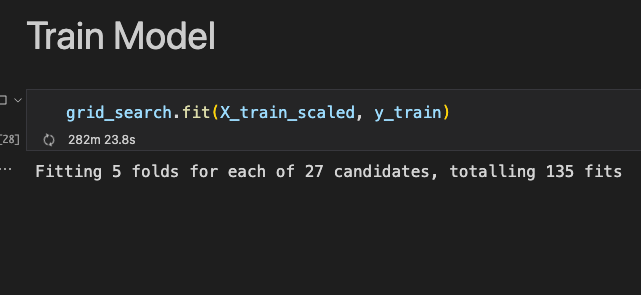

In [37]:
grid_search.best_params_

{'n_neighbors': 7}

In [38]:
best_model = grid_search.best_estimator_

Test Model

In [39]:
y_pred = best_model.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



## Intrepetatin of the model

## Evaluating

1. Accuracy
2. Precision
3. Confusion
4. Recall
5. F1 Score


In [40]:
# Benchmark
base_model = round(df2['current_value_category'].value_counts()[1]/df2.shape[0]*100, 2)
base_model

34.91

Model: KNN
Accuracy: 0.25523012552301255
precision: 0.08531468531468532
recall: 0.3333333333333333
F1 Score: 0.14
Confusion Matrix:


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



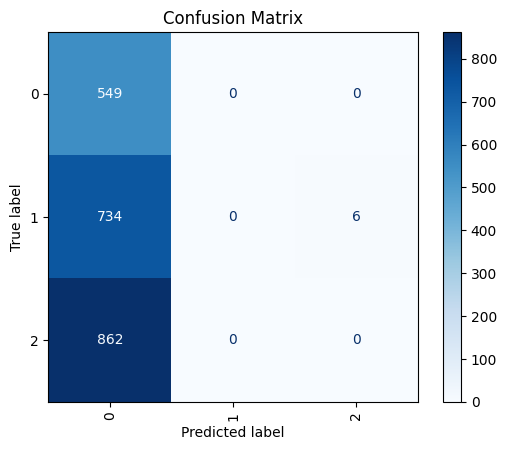

In [41]:
# Accuracy
from sklearn.metrics import ConfusionMatrixDisplay


print(f'Model: KNN')
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        cmap='Blues',
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()
print()
